<a href="https://colab.research.google.com/github/Bhawnadhaka/Gen--AI-Learning/blob/main/Multimodel_RAG_with_Gemini_Langchain_and_Google_AI_Studio_yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --upgrade langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [2]:
import os
import requests
from PIL import Image

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display ,Markdown

In [13]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [12]:
from langchain_core.messages import HumanMessage,SystemMessage

In [15]:
%pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00


In [16]:
from langchain_community.vectorstores import DocArrayInMemorySearch

In [19]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [21]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY






In [87]:
def load_model(model_name):
  if model_name=="gemini-pro":
    llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")
  else:
    llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest") # Changed to gemini-1.5-flash-latest for vision
  return llm

In [88]:
model_text=load_model("gemini-pro")

In [89]:
model_text.invoke("what about you?").content

'I am a large language model, trained by Google.  I don\'t have personal experiences, feelings, or a physical body.  I don\'t have opinions or beliefs.  My purpose is to process information and respond to your prompts in a helpful and informative way.  So, there\'s not much to tell about "me" in the same way you might tell about a person.  What would you like to know?'

In [90]:
def get_image(url,filename,extension):
  content=requests.get(url).content
  with open(f'/content/{filename}.{extension}','wb') as f:
    f.write(content)
    image=Image.open(f"/content/{filename}.{extension}")
    image.show()
    return image

In [91]:
image=get_image("https://tse2.mm.bing.net/th/id/OIP.-XvN2ur72DMh-1Nmm7aoZQHaEK?pid=Api&P=0&h=180","cute puppies","jpg")

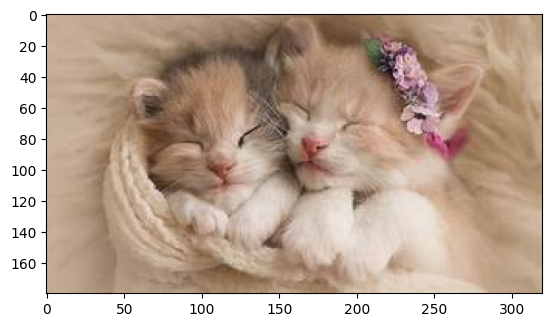

In [92]:
plt.imshow(image)
plt.show()

In [93]:
vision_model=load_model("gemini-1.5-flash")

In [97]:
prompt="give me summary of image in  cute words "

In [98]:
with open(f"/content/cute puppies.jpg", "rb") as f:
    image_bytes = f.read()

message=HumanMessage(
    content=[
        {
            "type":"text",
            "text":prompt,
        },
        {
            "type":"media",
            "data": image_bytes, # Corrected key to 'data'
            "mime_type": "image/jpeg"
        }
    ]
)

In [100]:

print(vision_model.invoke([message]).content)

Here's a cute summary of the image:

Two teeny-tiny kittens, snuggled up close like bestest buddies, are taking the sweetest nap ever! One even has a pretty flower crown.  They're all cozy and warm in a soft, fluffy blanket, dreaming purrfect dreams.


In [112]:
from langchain_community.document_loaders import TextLoader

In [116]:
loader=TextLoader("/content/Kittens data.txt")
text = loader.load()[0].page_content # Assign loaded content to 'text' variable
print(text)


Kittens Data

BASIC KITTEN FACTS:
1. Kittens are born after a gestation period of 64-67 days
2. Newborn kittens weigh approximately 85-115 grams
3. Kittens are born blind and deaf
4. Eyes typically open between 7-10 days of age
5. Ear canals open around 10-14 days
6. Kittens cannot regulate their body temperature for first 3 weeks
7. Newborns sleep 90% of the day
8. Kittens begin walking at 2-3 weeks old
9. Baby teeth start emerging at 2-3 weeks
10. Weaning begins around 4-5 weeks of age
11. Kittens should stay with mother until 8-12 weeks old
12. Adult teeth replace baby teeth by 6 months
13. Kittens reach sexual maturity at 4-6 months
14. Average litter size is 2-5 kittens
15. Kittens can be spayed/neutered as early as 8 weeks

PHYSICAL DEVELOPMENT:
16. Birth weight doubles by 1-2 weeks
17. Kittens gain 50-100 grams per week
18. Tail begins to move purposefully at 2-3 weeks
19. Kitten fur changes color as they mature
20. Paw pads are pink at birth, may darken with age
21. Whiskers a

In [133]:
from langchain.text_splitter import CharacterTextSplitter
from langchain_core.documents import Document
from langchain_community.vectorstores import FAISS

In [134]:
def get_text_chunks_langchain(text):
  text_splitter=CharacterTextSplitter(chunk_size=20,chunk_overlap=10)
  return [Document(page_content=x) for x in text_splitter.split_text(text)]

In [135]:
docs=get_text_chunks_langchain(text)

In [138]:
embeddings=GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [139]:
vectorstore=FAISS.from_documents(docs,embeddings)

In [141]:
retriever=vectorstore.as_retriever()

In [145]:
retriever.invoke("Hearing development.")

[Document(id='873a36ca-5a96-4512-bb70-cc74ad76d643', metadata={}, page_content='Kittens Data'),
 Document(id='0353d81f-c11b-4d72-98cb-05a1e37f4cf8', metadata={}, page_content='END OF KITTEN DATASET - 500 LINES COMPLETE'),
 Document(id='2df774fe-4ca4-457a-9629-b97a4f799378', metadata={}, page_content='KITTEN HEARING DEVELOPMENT:\n231. Born with closed ear canals\n232. Ears open around 10-14 days\n233. Initial hearing is muffled\n234. Full hearing develops by 4 weeks\n235. Superior hearing range compared to humans\n236. Can detect ultrasonic frequencies\n237. Directional hearing well-developed\n238. Sensitive to sound volume changes\n239. May startle at sudden loud noises\n240. Hearing loss can occur with age'),
 Document(id='8dbc6932-f47a-4836-b5ee-ded3db69983b', metadata={}, page_content='KITTEN DEVELOPMENT STAGES:\n191. Neonatal period: 0-2 weeks\n192. Transitional period: 2-4 weeks\n193. Socialization period: 4-12 weeks\n194. Juvenile period: 12 weeks-6 months\n195. Adolescent period

In [146]:
from langchain_core.runnables import RunnableLambda,RunnablePassthrough

In [147]:
llm_vision=load_model("gemini-1.5-flash")

In [150]:
llm_text=load_model("gemini-pro")

In [151]:
template="""
'''
{context}
'''
{information}

provide brief information about them.
"""


In [152]:
prompt=ChatPromptTemplate.from_template(template)

In [156]:
rag_chain=(
    {"context": retriever, "information": RunnablePassthrough()} # Use RunnablePassthrough() correctly
    | prompt
    | llm_text
    | StrOutputParser()
)

In [157]:
result=rag_chain.invoke("give me about their  health")

In [158]:
display(Markdown(result))

The provided text focuses on general kitten health and care, including vaccinations, deworming, spaying/neutering, and environmental needs.  There is no specific information about ear health for kittens in this dataset.

In [159]:
full_chain=(
    RunnablePassthrough() | llm_vision |StrOutputParser() | rag_chain
)

In [160]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x789cba72f550>, search_kwargs={}),
  information: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, template="\n'''\n{context}\n'''\n{information}\n\nprovide brief information about them.\n"), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x789cba745e90>, default_metadata=(), model_kwargs={})
| StrOutputParser()

In [161]:
full_chain


RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash-latest', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x789cc83ae010>, default_metadata=(), model_kwargs={})
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x789cba72f550>, search_kwargs={}),
    information: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'information'], input_types={}, partial_variables={}, template="\n'''\n{context}\n'''\n{information}\n\nprovide brief information about them.\n"), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('*******

In [163]:
url_1="https://tse2.mm.bing.net/th/id/OIP.-XvN2ur72DMh-1Nmm7aoZQHaEK?pid=Api&P=0&h=180"

In [164]:
image=get_image(url_1,"cute puppies","jpg")

In [178]:
message=HumanMessage(
    content=[

        {
            "type":"media",
            "data": image_bytes,
            "mime_type": "image/jpeg"
        }
    ]
)

In [ ]:
result=full_chain.invoke([message])